## Autism and total brain volume (tbv)



related news and paper info:
 
<https://www.spectrumnews.org/opinion/viewpoint/big-brains-may-hold-clues-to-origins-of-autism/>
 
</p>
 
<https://www.calorababy.co.za/kids-new/kids/brains-of-autistic-kids-still-larger-at-age-4-5/>
 
</p>
 
<https://www.cdc.gov/ncbddd/autism/data.html>
</p>

In [250]:
#this is the info I have to simulate 59 tbv of children with autism and
#38 with children without autism
na<-59#number of individuals with autism
nc<-38#number of individuals without autism (control group)
se_a<-13#se of autism group
se_c<-18#se of control group
mean_a<-1310.4#mean total brain volume group autism
mean_c<-1238.6#mean tbv control group
cia_down<-mean_a-1.96*se_a#bottom CI for autism group tbv
cia_up<-mean_a+1.96*se_a#upper CI for autism group
cic_down<-mean_c-1.96*se_c
cic_up<-mean_c+1.96*se_c

In [251]:
#SE=sd/sqrt(n)
#sd=se*sqrt(n)
sd_a<-se_a*sqrt(na)#sd autism group,
sd_c<-se_c*sqrt(nc)#sd control group
#I think you should add more error here, p value should be p = 0.02
#sd_a<-(se_a*sqrt(na))+10#let's add 10cc error
#sd_c<-(se_c*sqrt(nc))+10

In [252]:
tbv_a<-rnorm(na,mean_a,sd_a)
tbv_c<-rnorm(nc,mean_c,sd_c)
au_id<-rep("autism",na)
c_id<-rep("control",nc)    
tbv_data<-data.frame(group=c(au_id,c_id),tbv=c(tbv_a,tbv_c))
str(tbv_data)

'data.frame':	97 obs. of  2 variables:
 $ group: chr  "autism" "autism" "autism" "autism" ...
 $ tbv  : num  1237 1237 1195 1335 1440 ...


In [279]:
#let's do this again based on sample data!!!!
se_a<-sd(tbv_a)/sqrt(na)#se of autism group
se_c<-sd(tbv_c)/sqrt(nc)
mean_a<-1310.4#mean total brain volume group autism
mean_c<-1238.6#mean tbv control group
cia_down<-mean_a-1.96*se_a#bottom CI for autism group tbv
cia_up<-mean_a+1.96*se_a#upper CI for autism group
cic_down<-mean_c-1.96*se_c
cic_up<-mean_c+1.96*se_c

In [280]:
library(plyr)
mu <- ddply(tbv_data, "group", summarise, grp.mean=mean(tbv))
head(mu)
#I think this is unncessary

,group,grp.mean
,<fct>,<dbl>
1,autism,1304.556
2,control,1230.612


In [281]:
library(ggplot2)

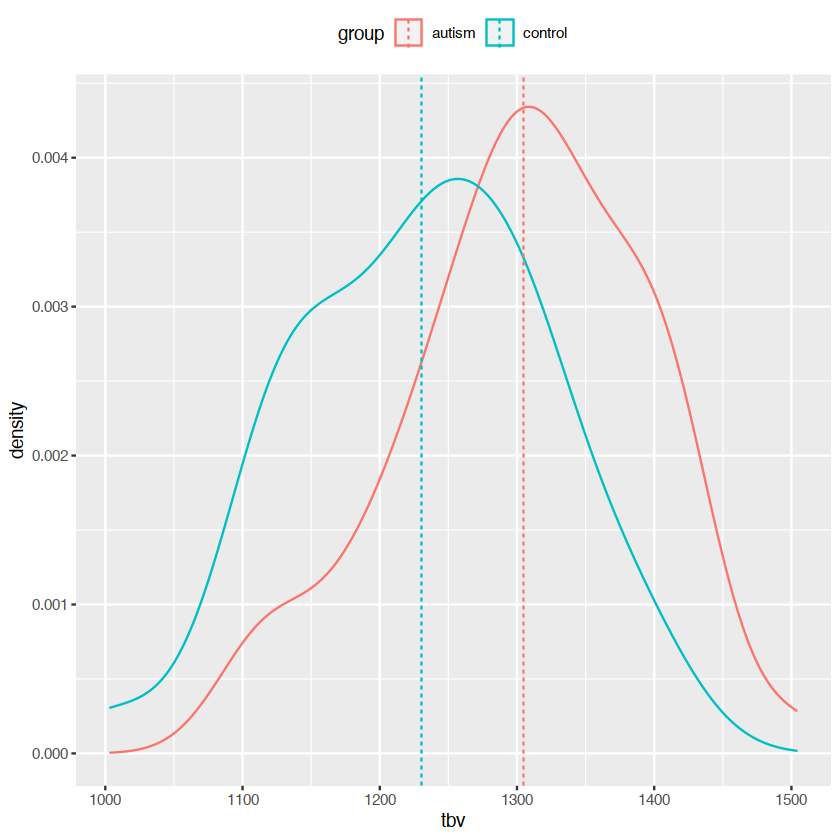

In [282]:
ggplot(tbv_data, aes(x=tbv, color=group)) +
  geom_density()+
  geom_vline(data=mu, aes(xintercept=grp.mean, color=group),
             linetype="dashed")+ theme(legend.position="top")

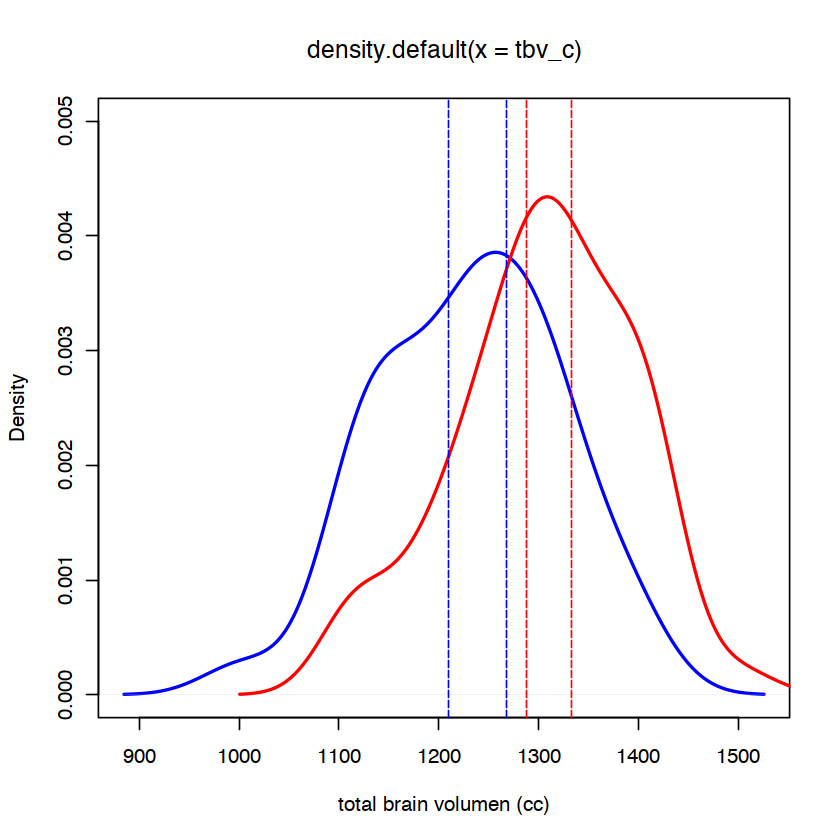

In [283]:
#try basic plot
plot(density(tbv_c),col="blue",ylim=c(0,0.005),xlab="total brain volumen (cc)",
    lwd=2)
lines(density(tbv_a),col="red",lwd=2)
abline(v=c(cic_down,cic_up),lty=5,col="blue")
abline(v=c(cia_down,cia_up),lty=5,col="red")
#cool!!!

In [284]:
tbv_data$group<-as.factor(tbv_data$group)
str(tbv_data)

'data.frame':	97 obs. of  2 variables:
 $ group: Factor w/ 2 levels "autism","control": 1 1 1 1 1 1 1 1 1 1 ...
 $ tbv  : num  1237 1237 1195 1335 1440 ...


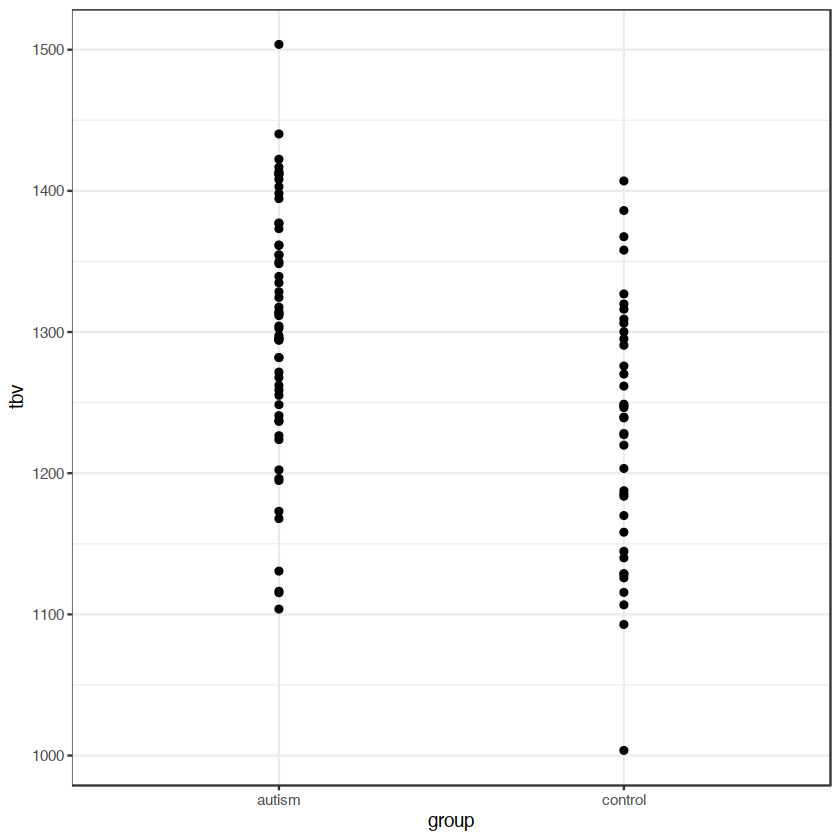

In [285]:
qplot(group,tbv,data=tbv_data)+theme_bw()

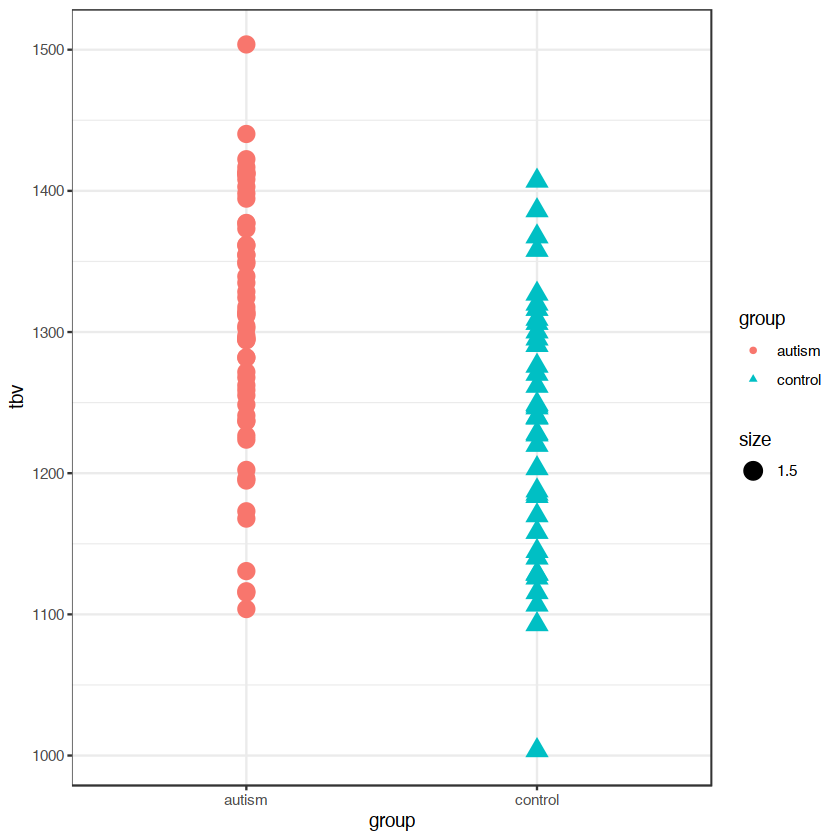

In [286]:
qplot(group,tbv,data=tbv_data,shape=group,color=group,size=1.5)+theme_bw()

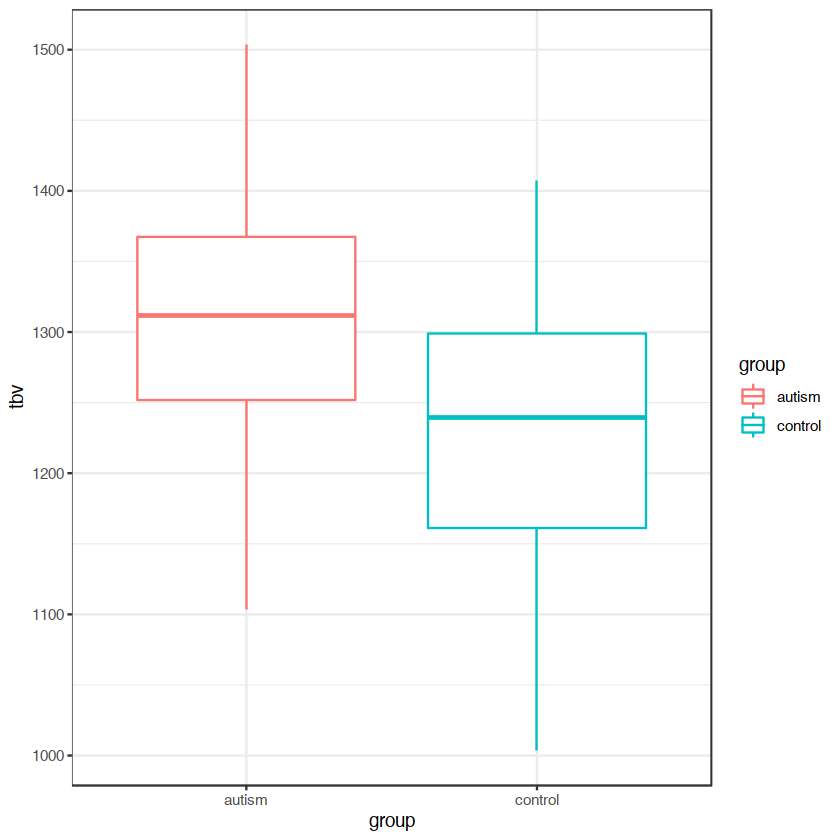

In [287]:
qplot(group,tbv,data=tbv_data,geom="boxplot",
color=group)+theme_bw()

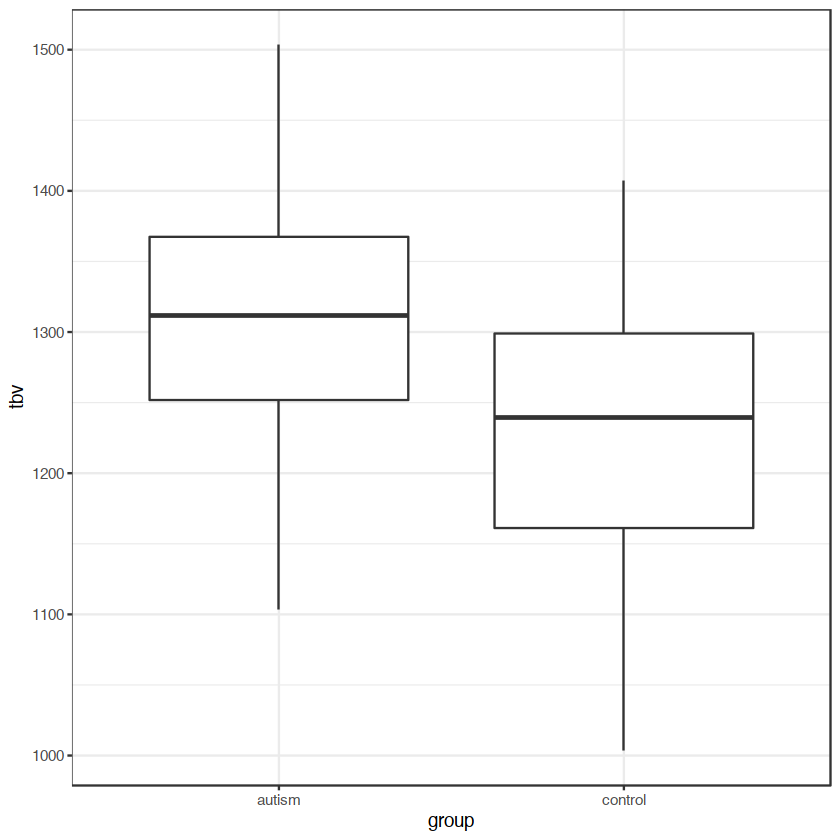

In [288]:
qplot(group,tbv,data=tbv_data,geom="boxplot")+theme_bw()

In [289]:
model.group<-lm(tbv~group,data=tbv_data)
model.null<-lm(tbv~1,data=tbv_data)

In [290]:
anova(model.null,model.group)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,96,887418.1,NA,NA,NA,NA
2,95,761040.5,1,126377.5,15.77559,0.0001387398


In [291]:
summary(model.group)


Call:
lm(formula = tbv ~ group, data = tbv_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-227.002  -60.620    8.211   68.646  199.168 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1304.56      11.65 111.956  < 2e-16 ***
groupcontrol   -73.94      18.62  -3.972 0.000139 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 89.5 on 95 degrees of freedom
Multiple R-squared:  0.1424,	Adjusted R-squared:  0.1334 
F-statistic: 15.78 on 1 and 95 DF,  p-value: 0.0001387


In [292]:
library(arm)
display(model.group)

lm(formula = tbv ~ group, data = tbv_data)
             coef.est coef.se
(Intercept)  1304.56    11.65
groupcontrol  -73.94    18.62
---
n = 97, k = 2
residual sd = 89.50, R-Squared = 0.14


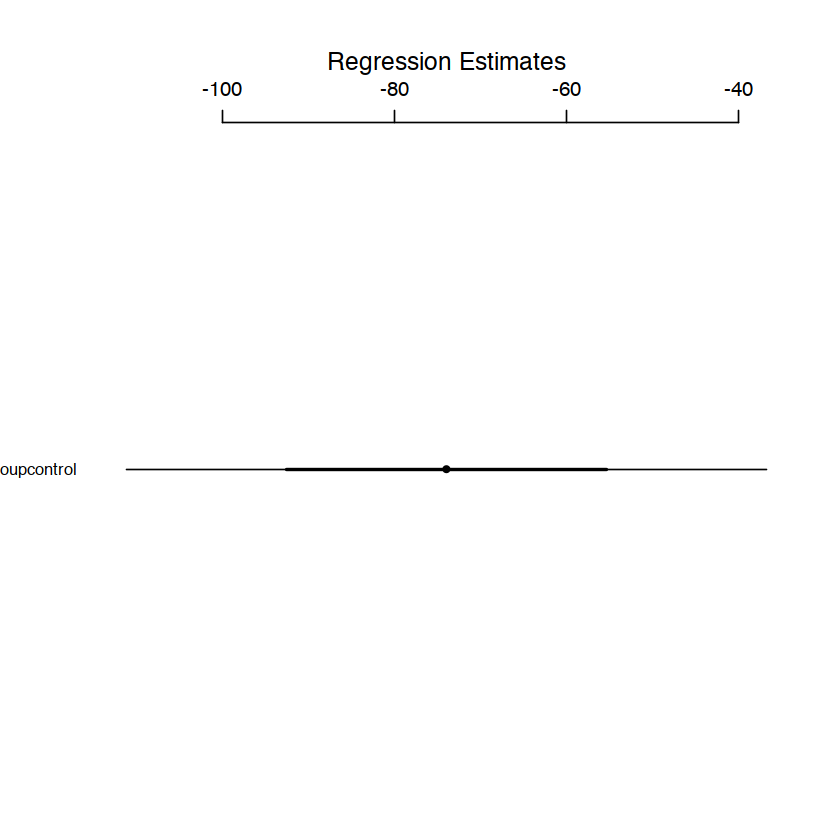

In [293]:
coefplot(model.group)#library(arm)

Fig 1. the difference in mean tbv (solid plot) with approximate 68% (thicker shorter bars) and 95% CI (thinner longer bars)

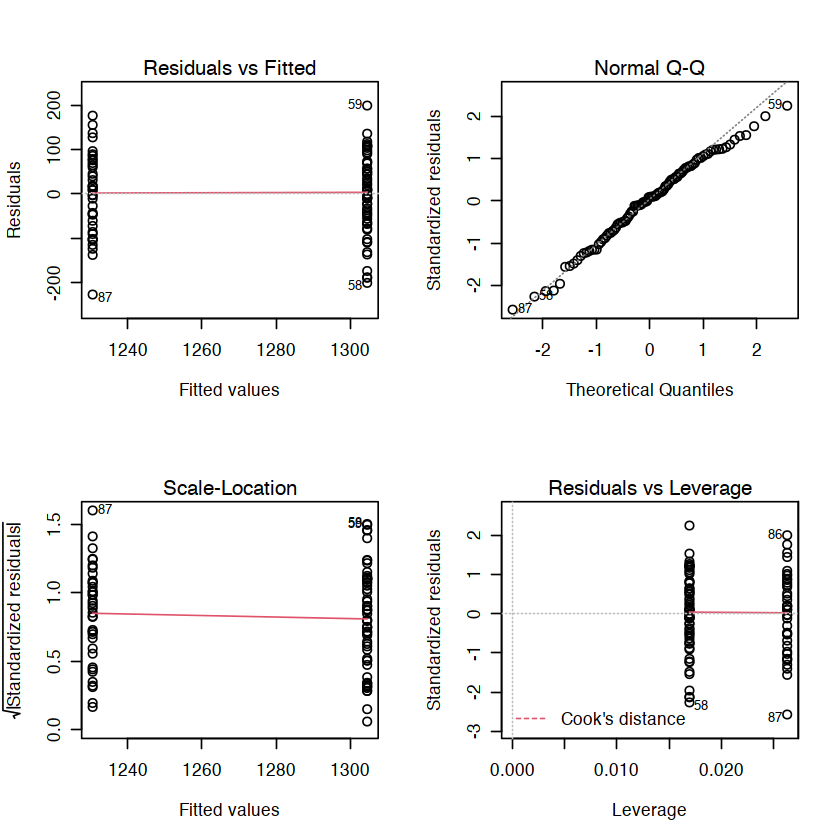

In [294]:
par(mfrow = c(2, 2))
plot(model.group)

In [295]:
confint(model.group)

,2.5 %,97.5 %
(Intercept),1281.4227,1327.68861
groupcontrol,-110.9035,-36.98455


In [296]:
t.test(tbv~group, data=tbv_data)


	Welch Two Sample t-test

data:  tbv by group
t = 3.9459, df = 77.35, p-value = 0.0001737
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  36.63215 111.25586
sample estimates:
 mean in group autism mean in group control 
             1304.556              1230.612 


group,n,Mean,Conf.level,Trad.lower,Trad.upper
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
autism,59,1300,0.95,1280,1330
control,38,1230,0.95,1200,1260


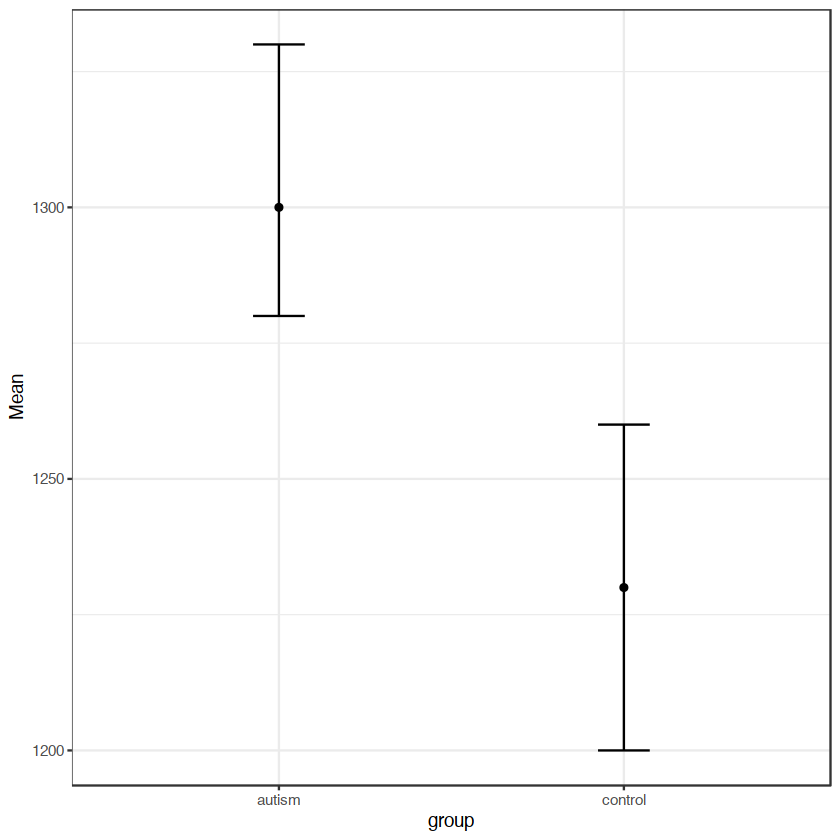

In [297]:
library(rcompanion)#easy solution
#create a database with waht we need
Sum = groupwiseMean(tbv ~ group,
                    data   = tbv_data,
                    conf   = 0.95,
                    digits = 3)
Sum
qplot(x    = group , 
      y    = Mean,
      data = Sum) +geom_errorbar(aes( 
                   ymin  = Trad.lower, 
                   ymax  = Trad.upper, 
                   width = 0.15))+theme_bw()

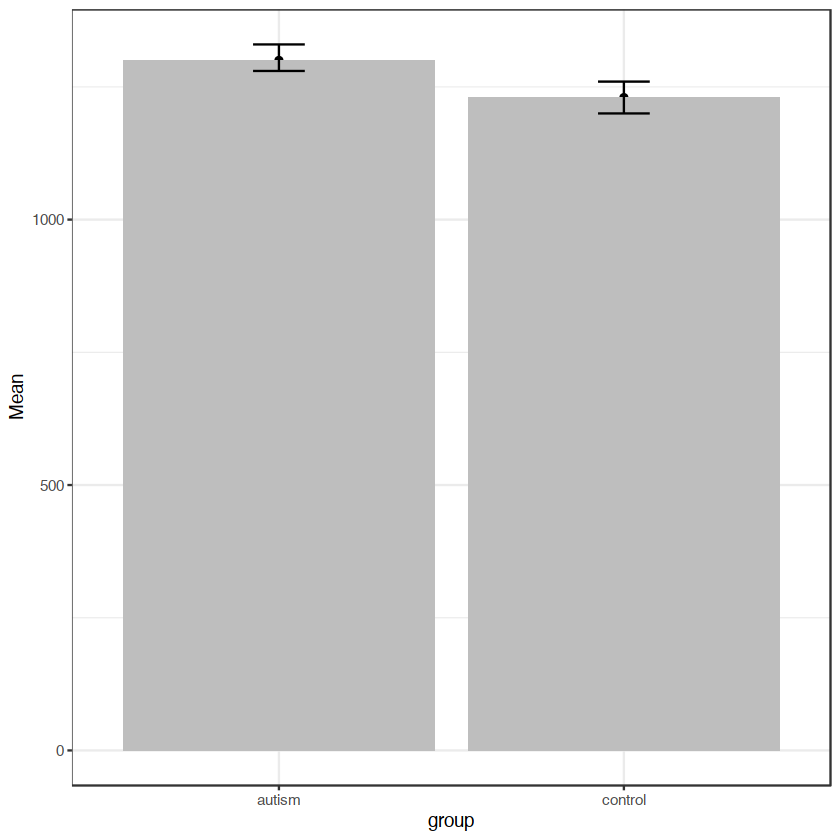

In [298]:
qplot(x    = group , 
      y    = Mean,
      data = Sum) +

geom_bar(stat ="identity",
         fill = "gray") +

geom_errorbar(aes(ymin  = Trad.lower, 
                  ymax  = Trad.upper, 
                  width = 0.15))+theme_bw()

In [299]:
#I want one with SD and another one with bars and SE or whatever I want
#but let's go back to the SE, I want it shaded!!!!

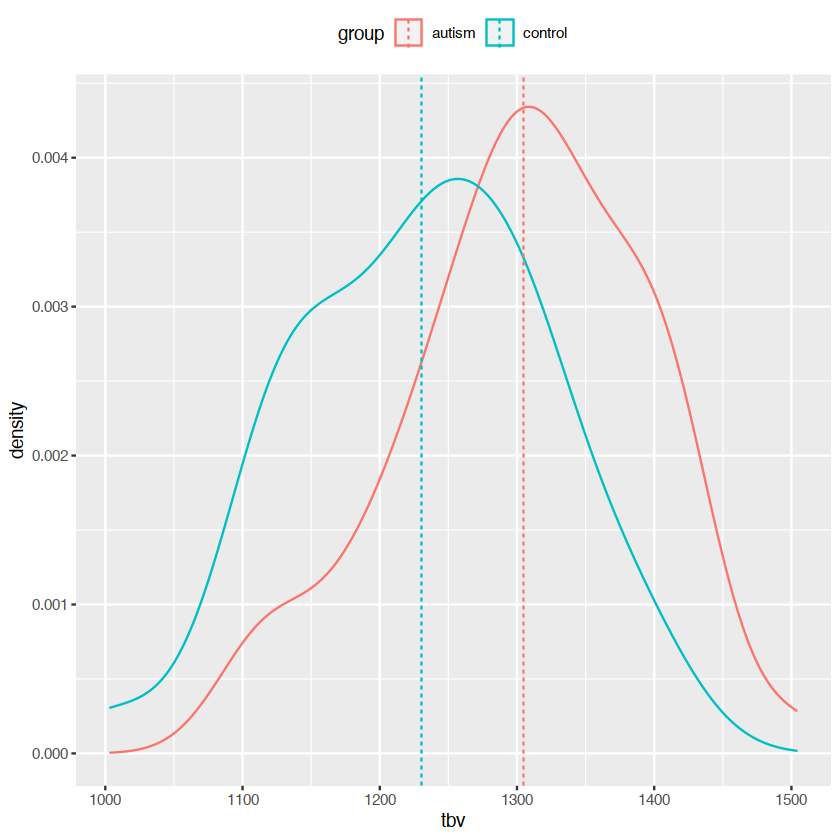

In [300]:
ggplot(tbv_data, aes(x=tbv, color=group)) +
  geom_density()+
  geom_vline(data=mu, aes(xintercept=grp.mean, color=group),
             linetype="dashed")+ theme(legend.position="top")

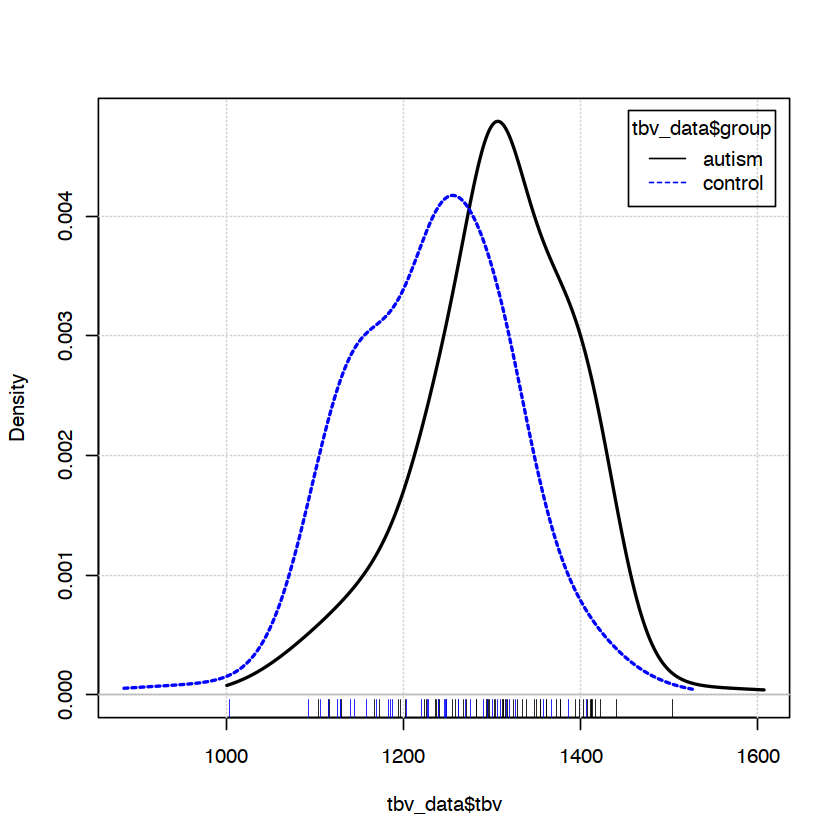

In [301]:
# Comparing densities by group using car library
library(car)
densityPlot(tbv_data$tbv, tbv_data$group)#cool!!!

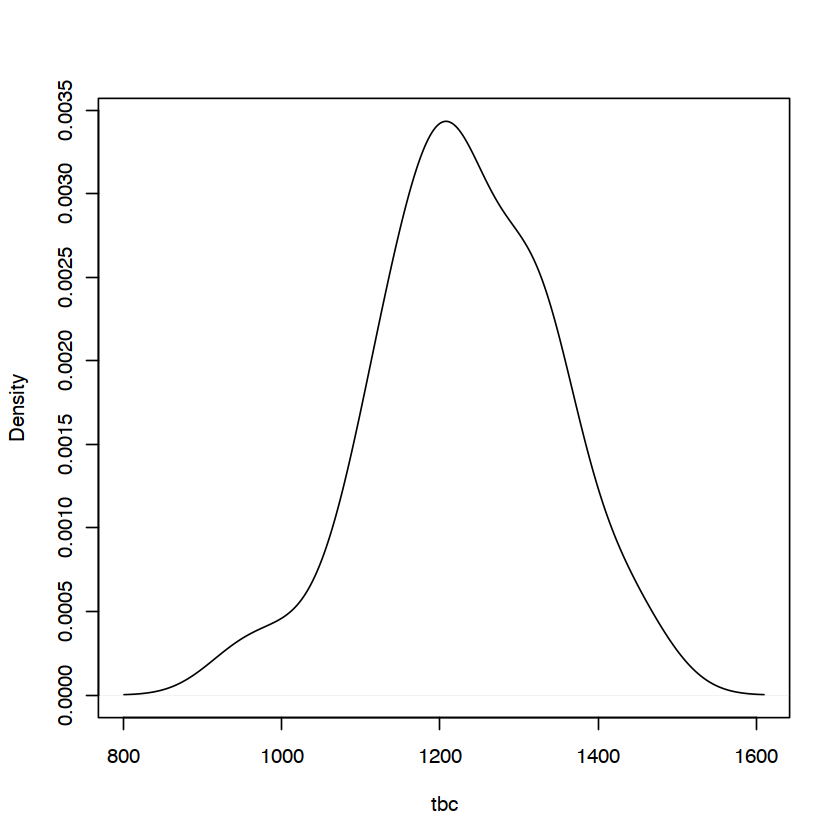

In [302]:
plot(density(tbc_c),                                            # Draw density plot
     main = "",                                              # No main title
     xlab = "tbc")        

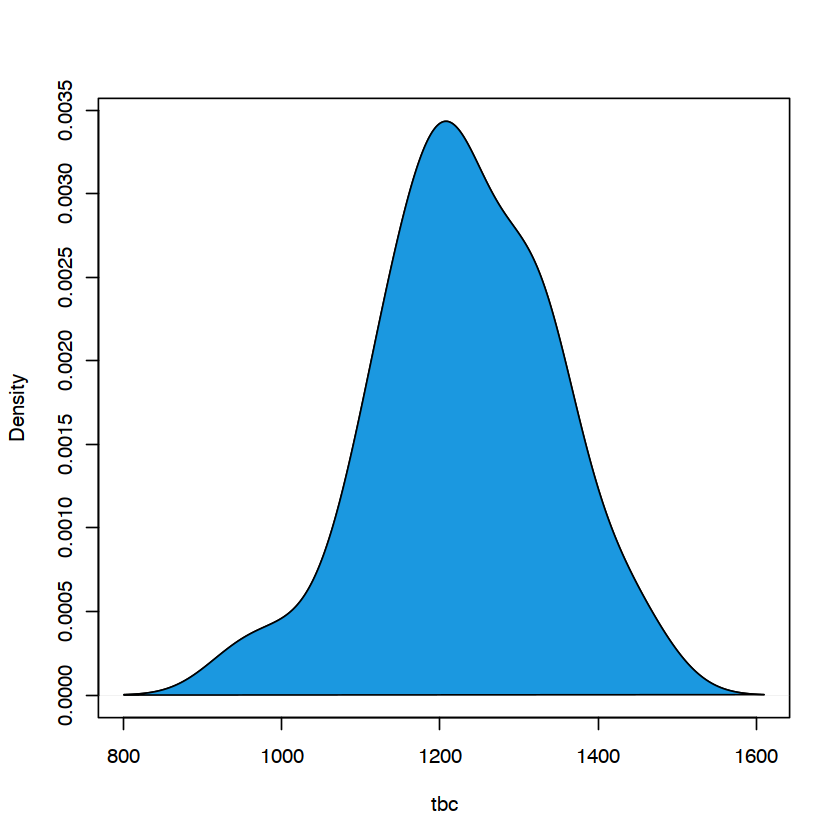

In [303]:
plot(density(tbc_c),                                            # Draw density plot
     main = "",                                              # No main title
     xlab = "tbc")  
polygon(c(min(density(tbc_c)$x), density(tbc_c)$x),                # X-Coordinates of polygon
        c(0, density(tbc_c)$y),                                 # Y-Coordinates of polygon
        col = "#1b98e0")                                     # Color of polygon

In [304]:
poly_range <- density(tbv_c)$x > mean(tbv_c)-se_c & density(tbv_c)$x < mean(tbv_c)+se_c       # Set polygon x-range
poly_range2 <- density(tbv_a)$x > mean(tbv_a)-se_a & density(tbv_a)$x < mean(tbv_a)+se_a       # Set polygon x-range

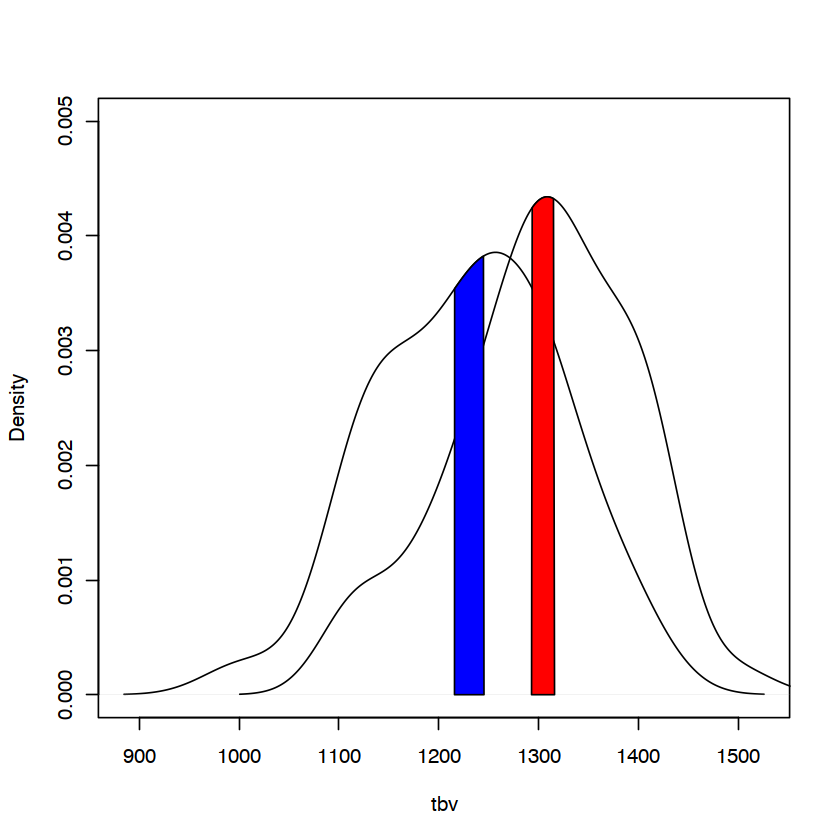

In [307]:
plot(density(tbv_c),                                            # Draw density plot
     main = "",                                              # No main title
     xlab = "tbv",ylim=c(0,0.005))
lines(density(tbv_a))                                           # Draw density plot)
polygon(c(mean(tbv_c)-se_c, density(tbv_c)$x[poly_range], mean(tbv_c)+se_c),                # X-Coordinates of polygon range
        c(0, density(tbv_c)$y[poly_range], 0),                  # Y-Coordinates of polygon range
        col = "blue")#yes!!!
polygon(c(mean(tbv_a)-se_a, density(tbv_a)$x[poly_range2], mean(tbv_a)+se_a),                # X-Coordinates of polygon range
        c(0, density(tbv_a)$y[poly_range2], 0),                  # Y-Coordinates of polygon range
        col = "red")#yes!!!

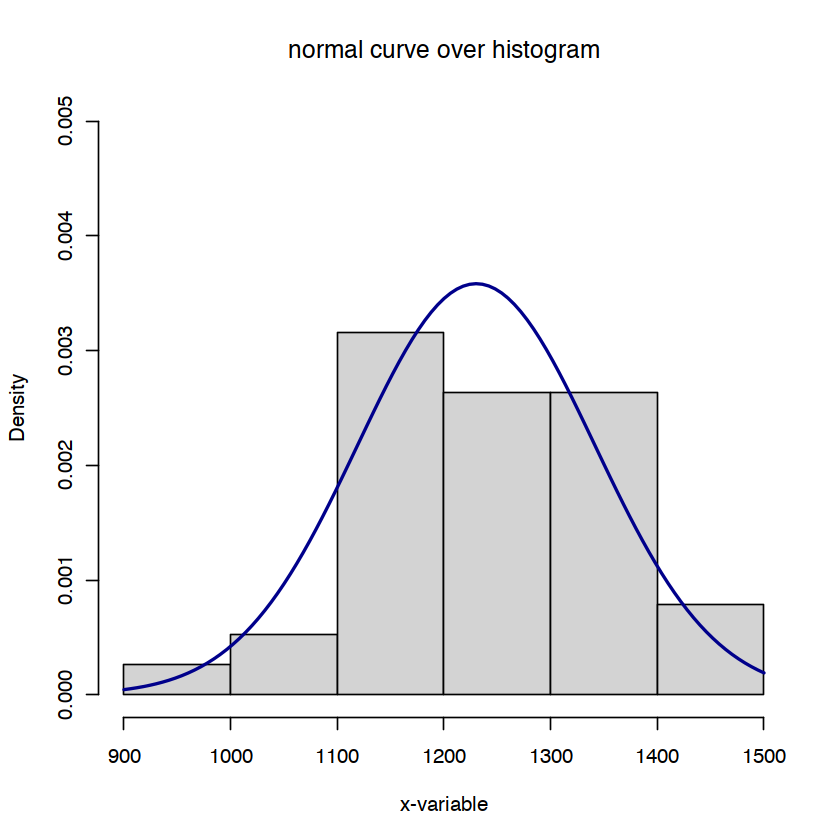

In [317]:
hist(tbc_c, prob=TRUE, 
     xlab="x-variable", 
     main="normal curve over histogram",ylim=c(0,0.005))
curve(dnorm(x, mean=mean(tbc_c), sd=sd(tbc_c)), 
      col="darkblue", lwd=2, add=TRUE, yaxt="n")

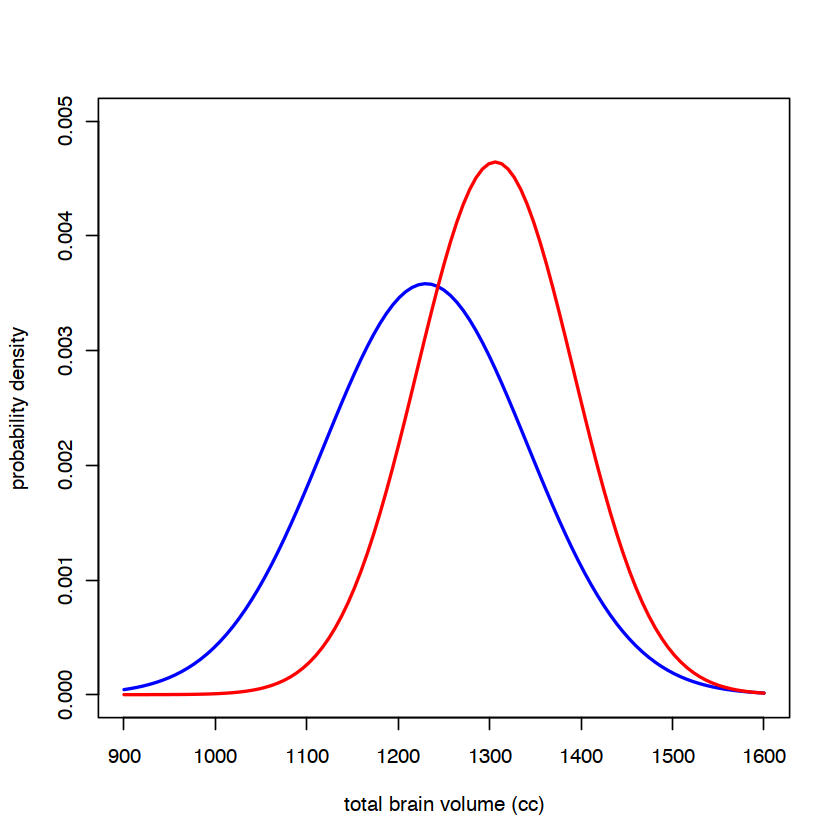

In [329]:
plot(1, type = "n",                         # Remove all elements of plot
     xlab = "total brain volume (cc)", ylab = "probability density",
     xlim = c(900, 1600), ylim = c(0, 0.005))
curve(dnorm(x, mean=mean(tbc_c), sd=sd(tbc_c)), 
      col="blue", lwd=2, add=TRUE, yaxt="n")
curve(dnorm(x, mean=mean(tbc_a), sd=sd(tbc_a)), 
      col="red", lwd=2, add=TRUE, yaxt="n")

ERROR: Error in pnorm(upper_bound, population_mean, sd): Non-numeric argument to mathematical function


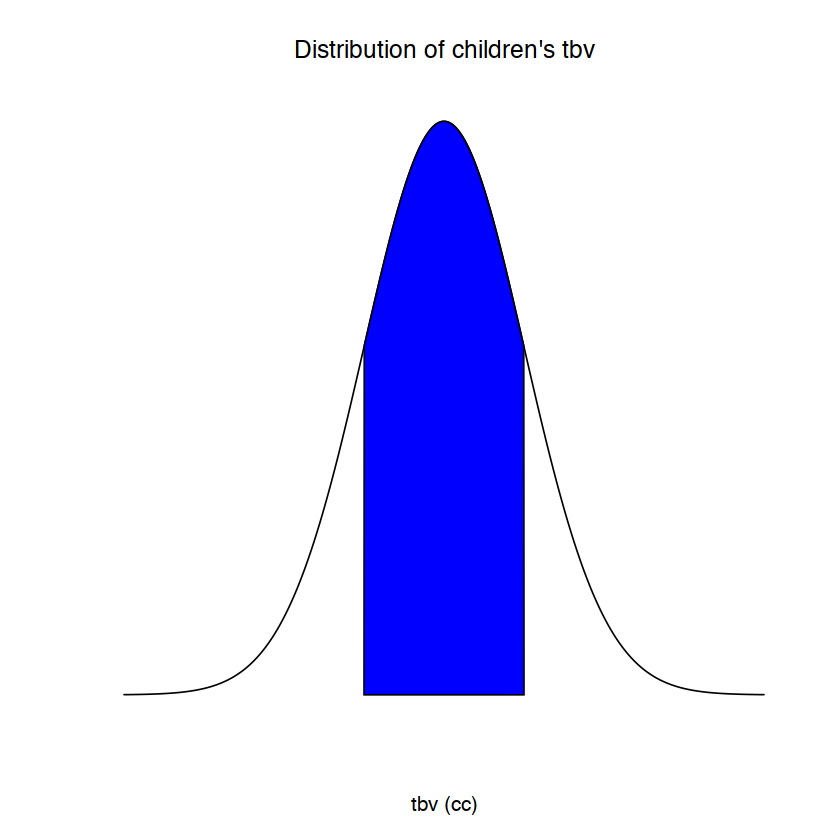

In [332]:
population_mean <- mean(tbv_c)
population_sd <- sd(tbv_c)#you can add here the SE instead
sd_to_fill <- 1
lower_bound <- population_mean - population_sd * sd_to_fill
upper_bound <- population_mean + population_sd * sd_to_fill
 
# Generates equally spaced values within 4 standard deviations of the mean
# This is used to connect the points on the curve so the more points the better
x <- seq(-4, 4, length = 1000) * population_sd + population_mean
 
# Returns the height of the probably distribution at each of those points
y <- dnorm(x, population_mean, population_sd)
 
# Generate the plot, where:
# - type: the type of plot to be drawn where "n" means do not plot the points
# - xlab: the title of the x axis
# - ylab: the title of the y axis
# - main: the overall title for the plot
# - axes: when false it suppresses the axis automatically generated by the high level plotting function so that we can create custom axis
plot(x, y, type="n", xlab = "tbv (cc)", ylab = "", main = "Distribution of children's tbv", axes = FALSE)
 
# Connect all of the points with each other to form the bell curve
lines(x, y)
 
# Returns a vector of boolean values representing whether the x value is between the two bounds then
# filters the values so that only the ones within the bounds are returned
bounds_filter <- x >= lower_bound & x <= upper_bound
x_within_bounds <- x[bounds_filter]
y_within_bounds <- y[bounds_filter]
 
# We want the filled in area to extend all the way down to the y axis which is why these two lines are necessary
# It makes the first point in the polygon (lower_bound, 0) and the last point (upper_bound, 0)
x_polygon <- c(lower_bound, x_within_bounds, upper_bound)
y_polygon <- c(0, y_within_bounds, 0)
 
polygon(x_polygon, y_polygon, col = "blue")
 
# Now determine the probability that someone falls between the two bounds so we can display it above the curve
# Remember that pnorm returns the probability that a normally distributed random number will be less than the given number
probability_within_bounds <- pnorm(upper_bound, population_mean, sd) - pnorm(lower_bound, population_mean, population_sd)
 
# Concatenate the various values so we can display it on the curve
text <- paste("p(", lower_bound, "< height <", upper_bound, ") =", signif(probability_within_bounds, digits = 3))
 
# Display the text on the plot. The default "side" parameter is 3, representing the top of the plot.
mtext(text)
 
# Add an axis to the current plot, where:
# - side: which side of the plot the axis should be drawn on where 1 represents the bottom
# - at: the points at which the tick-marks are to be drawn
# - pos: the coordinate at which the axis line is to be drawn
sd_axis_bounds = 5
axis_bounds <- seq(-sd_axis_bounds * population_sd + population_mean, sd_axis_bounds * population_sd + population_mean, by = population_sd)
axis(side = 1, at = axis_bounds, pos = 0)